In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Минипроект

Опираясь на [карту](https://eusipa.org/wp-content/uploads/European_map_20160530_2016.pdf) Европейской ассоциации структурных инвестиционных
продуктов (EUSIPA) и ее [российскую адаптацию](https://naufor.ru/tree.asp?n=22890)

привести 2-3 ссылки на

*   структурные продукты, представленные на россиском рынке,
*   доступные наборы данных (напрмер, [HKEX](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)).

Структурные продукты на российском рынке представляют собой комплексные финансовые инструменты, сочетающие различные базовые активы и стратегии для достижения определенных инвестиционных целей. Они позволяют инвесторам получать доход, зависящий от динамики выбранных активов, при этом часто обеспечивая защиту капитала.

Примеры структурных продуктов на российском рынке:

Структурные облигации с полной защитой капитала: Эти инструменты гарантируют возврат вложенных средств при наступлении определенных условий, одновременно предоставляя возможность получения дополнительного дохода, связанного с динамикой базового актива. Например, Сбербанк предлагает такие продукты для финансовых институтов.
https://www.sberbank.ru/ru/credit_org/investments/structured-products?utm_source=chatgpt.com

Структурные продукты с участием в росте активов: Эти продукты позволяют инвесторам получать доход, пропорциональный росту стоимости базового актива, при этом обеспечивая защиту капитала. Финансовая группа "Финам" предоставляет информацию о таких продуктах и их особенностях.
https://www.finam.ru/publications/item/chto-takoe-strukturnye-produkty-i-kak-na-nix-zarabotat-20200929-11420/?utm_source=chatgpt.com

Доступные наборы данных по структурным продуктам:

В России доступ к подробным наборам данных по структурным продуктам может быть ограничен. Однако некоторые ресурсы предоставляют аналитические обзоры и информацию о рынке:

Национальная ассоциация участников фондового рынка (НАУФОР): НАУФОР публикует обзоры и исследования, связанные с российским рынком структурных продуктов. Например, на их сайте доступен обзор секции "Структурные продукты" XIV Международного форума.
https://nfa.ru/upload/iblock/046/Obzor-sektsii-Strukturnye-produkty.pdf?utm_source=chatgpt.com

Финансовый журнал "Финам.Ру": Публикует статьи и аналитические материалы о структурных продуктах, их видах и особенностях на российском рынке. Например, статья "Структурные продукты ‒ 2024" предоставляет актуальную информацию о тенденциях и возможностях для инвесторов.
https://www.finam.ru/publications/item/strukturnye-produkty-2024-20240326-2013/?utm_source=chatgpt.com

# Cтруктурный продукт с полной защитой капитала

## СП с использованием бинарных опционов

Пример. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается, что текущая цена акции, равная 100 руб., не изменится более чем на 10%. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная
ставка – 7%.

Постройте структурный продукт с полной защитой капитала и использованием опционной стратегии бинарный диапазон (binary range).

In [ ]:
# оценка стоимости бинарного опциона колл
def binary_option_call(t, S, K, T, r, q, sigma):

    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(d1)

# оценка стоимости бинарного опциона пут
def binary_option_put(t, S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(-d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(-d1)

In [ ]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3
n = 100

In [ ]:
K=90
b90 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
K=110
b110 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
print('digital range = ', b90-b110)

digital range =  0.24307515482345715


In [ ]:
risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(b90-b110))
print('количество опционных стратегий', Q)

количество опционных стратегий 27813


In [ ]:
print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

максимальная доходность, годовых =  0.27813
максимальная доходность, непрерывно =  0.24539807222181784


In [ ]:
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

Пример. Постройте график доходности структурного продукта в сравнении с доходностью базового актива и безрисковой ставки.

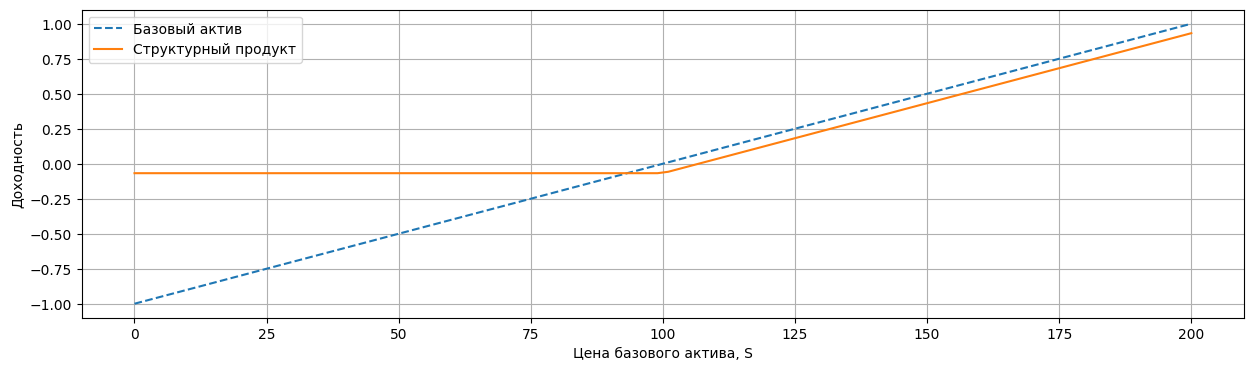

In [ ]:
risk_part = N - N * np.exp(-r * T)
c = call(S, K, T, sigma, r, q)
PR = S * round(risk_part / c) / N

underlying_asset_profit = np.linspace(- S, S, n) / S
struct_product_profit = np.maximum(0, underlying_asset_profit) - round(risk_part / c) * c / N

x = np.linspace(0, 2 * S, n)
plt.figure(figsize=(15, 4))
#plt.title('Profit UA vs OC')
plt.plot(x, underlying_asset_profit, '--', label='Базовый актив')
plt.plot(x, struct_product_profit,  label='Структурный продукт')
plt.ylabel('Доходность')
plt.xlabel('Цена базового актива, S')
plt.grid()
plt.legend()
plt.show()

Пример. Постройте график зависимости коэффициента участия от встроенной комиссии, проварьируйте комиссию от 0 до 10% с шагом 1%.

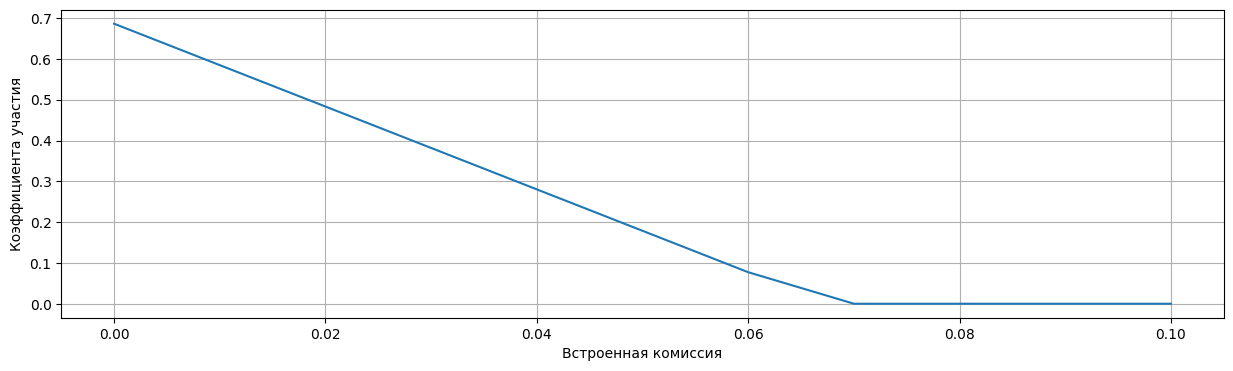

In [ ]:
da = np.exp(-r * T) * N

Q = lambda fees: ( N * (1 - fees)  - da ) / c
fees = (np.linspace(0.0, 0.1, 11))
PR = K * Q(fees) / N

plt.figure(figsize=(15, 4))
#plt.title('PR from fees value')
plt.plot(fees, np.maximum(PR, 0))
plt.xlabel('Встроенная комиссия')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Постройте график зависимости коэффициента участия от процентных ставок (депозитная и безрисковая ставки равны), проварьируйте ставки от 0 до 20% с шагом 1%.

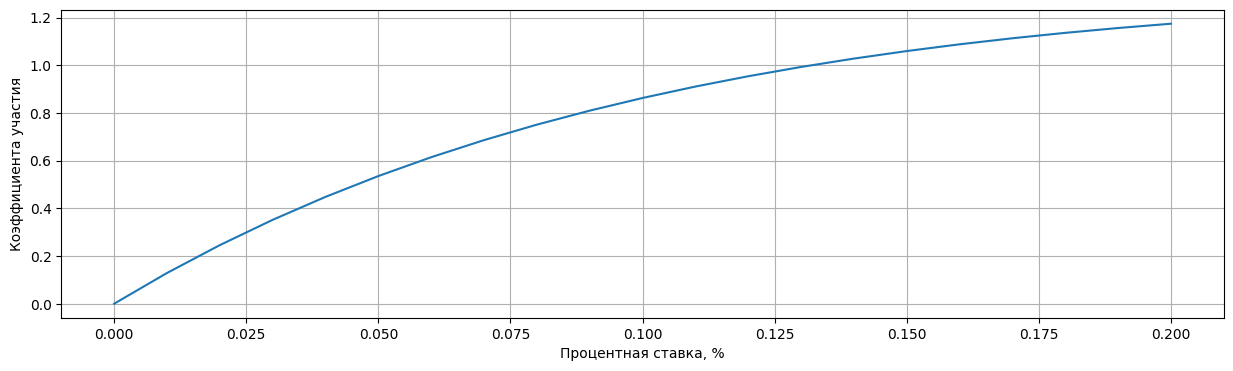

In [ ]:
Q = lambda da, c: ( N * (1 - 0.0)  - da ) / c
rs = np.linspace(0, 0.2, 21)
cs = np.fromiter((call(S, K, T, sigma, ri, q) for ri in rs), dtype=np.float32)
das = np.exp(-rs * T) * N
Qs = np.fromiter((Q(da,c) for da,c in zip(das, cs)), dtype=np.float32)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from interest rate')
plt.plot(rs, np.maximum(PR, 0))
plt.xlabel('Процентная ставка, %')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

### Задача

Задача. Постройте трехмерных график зависимости коэффициента участия от депозитной и безрисковой ставок, проварьируйте ставки от 0 до 25% с шагом 1%.

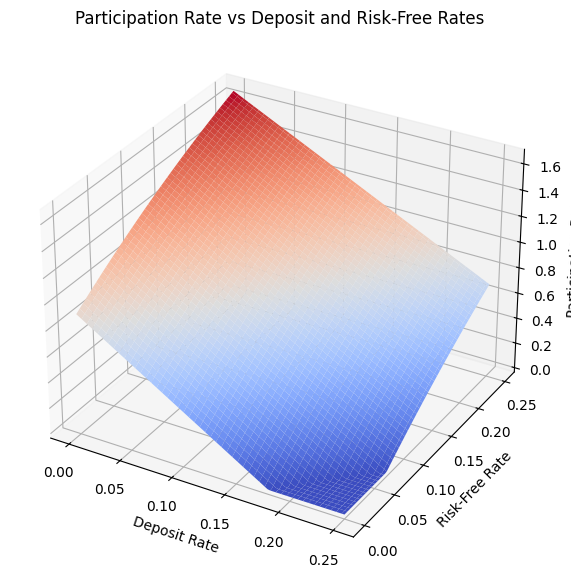

In [ ]:
# Параметры для варьирования ставок
deposit_rates = np.linspace(0, 0.25, 100)  # Депозитная ставка
risk_free_rates = np.linspace(0, 0.25, 100)  # Безрисковая ставка
deposit_rates, risk_free_rates = np.meshgrid(deposit_rates, risk_free_rates)

# Формула коэффициента участия как функция депозитной и безрисковой ставок
def participation_rate_rates(deposit_rates, risk_free_rates, K=100, S=100, sigma=0.2, T=365):
    d2 = (np.log(S / K) + (risk_free_rates - deposit_rates - 0.5 * sigma**2) * T / 365) / (sigma * np.sqrt(T / 365))
    return np.maximum((S / K) * np.exp(-risk_free_rates * T / 365) * (1 + d2), 0)

# Расчет коэффициента участия
PR_rates = participation_rate_rates(deposit_rates, risk_free_rates)

# Построение графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(deposit_rates, risk_free_rates, PR_rates, cmap='coolwarm')

# Подписи осей
ax.set_title("Participation Rate vs Deposit and Risk-Free Rates")
ax.set_xlabel("Deposit Rate")
ax.set_ylabel("Risk-Free Rate")
ax.set_zlabel("Participation Rate")

plt.show()


Пример. Постройте график зависимости коэффициента участия от волатильности базового актива, проварьируйте волатильность от 0 до
100% с шагом 5%.

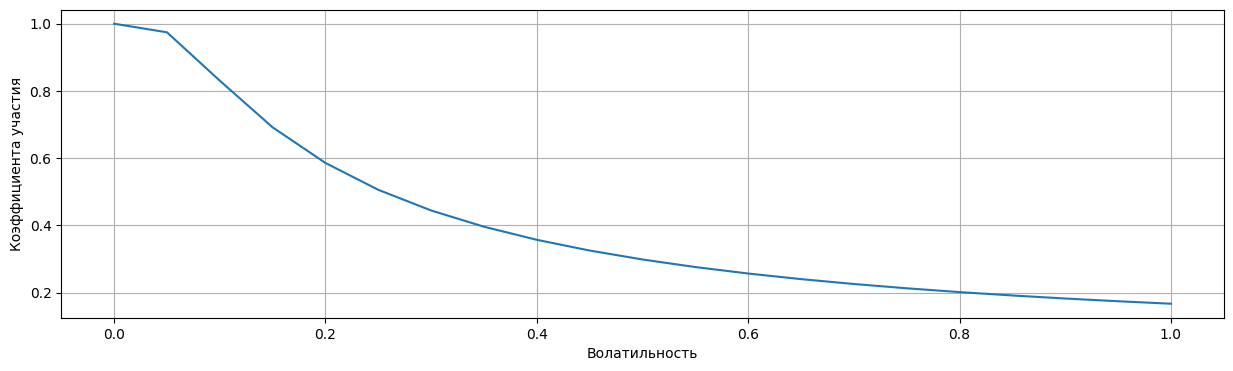

In [ ]:
vs = np.linspace(1e-5, 1, 21)
cs = call(S, K, T, vs, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from volatility')
plt.plot(vs, PR)
plt.xlabel('Волатильность')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Пример. Постройте график влияния срока продукта (от 0 до 100 лет, с
шагом 6 месяцев) на соотношение безрискового и рискового вложений.

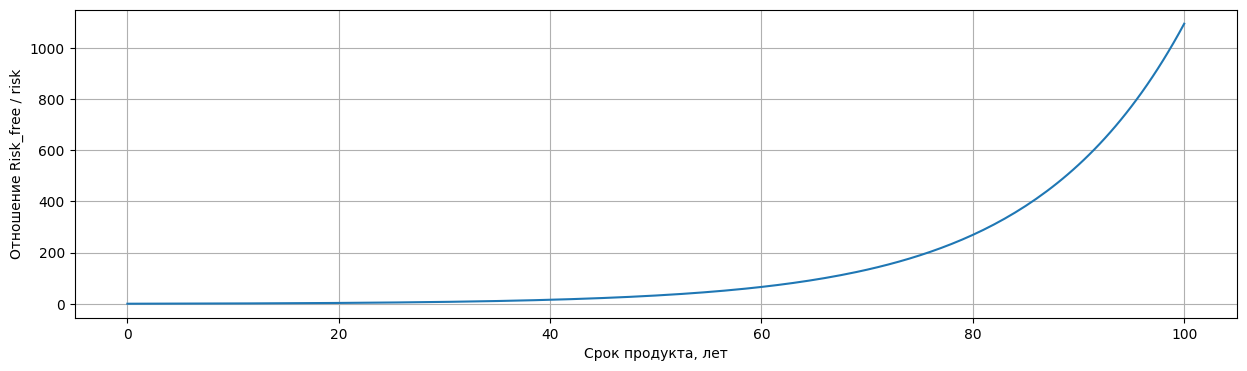

In [ ]:
Ts = np.linspace(1e-5, 100, 201)
risk_parts = N - N * np.exp(-r * Ts)
ratios = risk_parts / (N - risk_parts)

plt.figure(figsize=(15, 4))
#plt.title('Risk-free to risk fraction relation on maturity date')
plt.plot(Ts, ratios)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Отношение Risk_free / risk')
plt.grid()
plt.show()

Пример. Постройте график зависимости коэффициента участия от срока
продукта (от 0 до 20 лет, с шагом 6 месяцев).


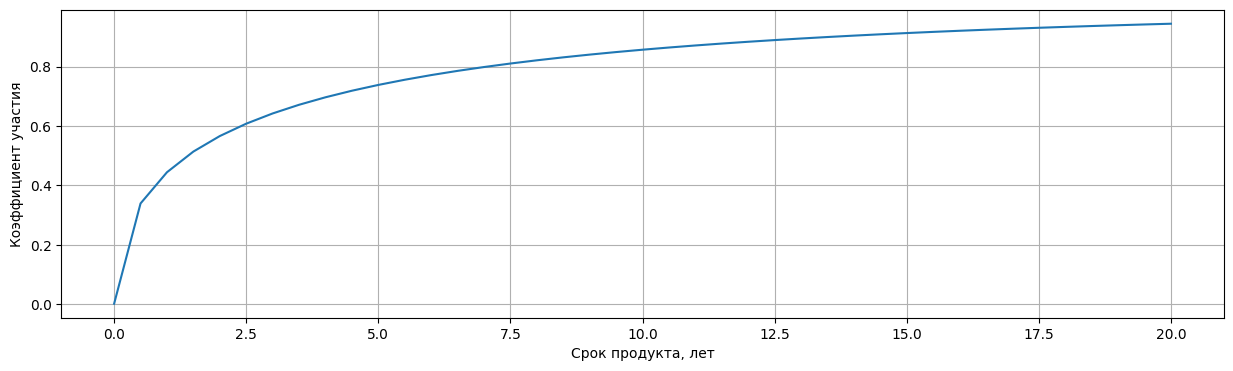

In [ ]:
Ts = np.linspace(1e-5, 20, 41)
cs = call(S, K, Ts, sigma, r, q)
das = np.exp(-r * Ts) * N
Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c
Qs = np.fromiter((Q(c, d) for c,d in zip(cs, das)), dtype=np.float64)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from maturity date')
plt.plot(Ts, PR)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график коэффициента участия от страйка продукта
(от 80 до 140, с шагом 10).

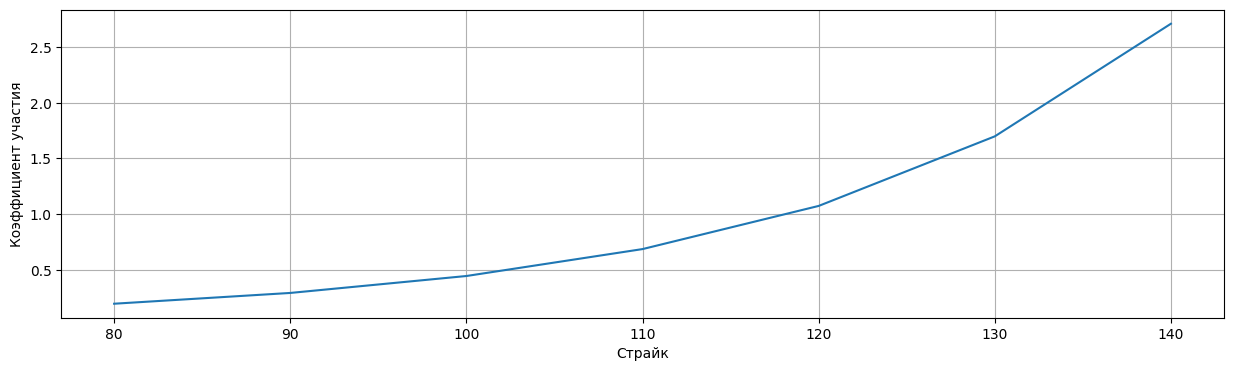

In [ ]:
Ks = np.linspace(80, 140, 7)
cs = call(S, Ks, T,  sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
plt.plot(Ks, PR)
plt.xlabel('Страйк')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график доходности продуктов с разными страйками и
100% защитой капитала.

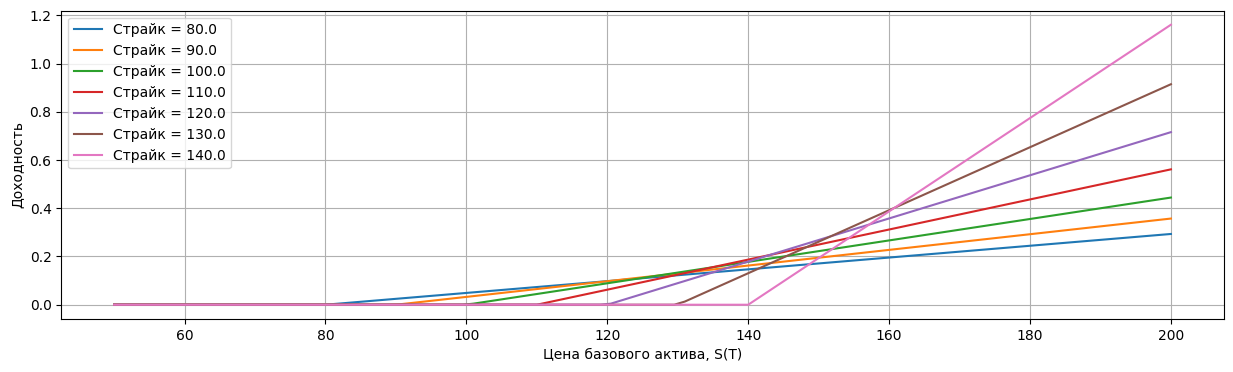

In [ ]:
Ks = np.linspace(80, 140, 7)

cs = call(S, Ks, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da) / c
Qs = Q(cs)
# Qs = np.fromiter((Q(c) for c in zip(cs, das)), dtype=np.float64)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('Profit on UA')
for i, pr in enumerate(PR):
    rs = np.maximum(0, pr * (Sm - Ks[i]) / Ks[i])
    plt.plot(Sm, rs, label=f'Страйк = {Ks[i]}')
plt.xlabel('Цена базового актива, S(T)')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

Пример. Постройте графики доходностей продуктов с одним страйком и
разной степенью защиты капитала (от 80% до 150%, с шагом 10%)

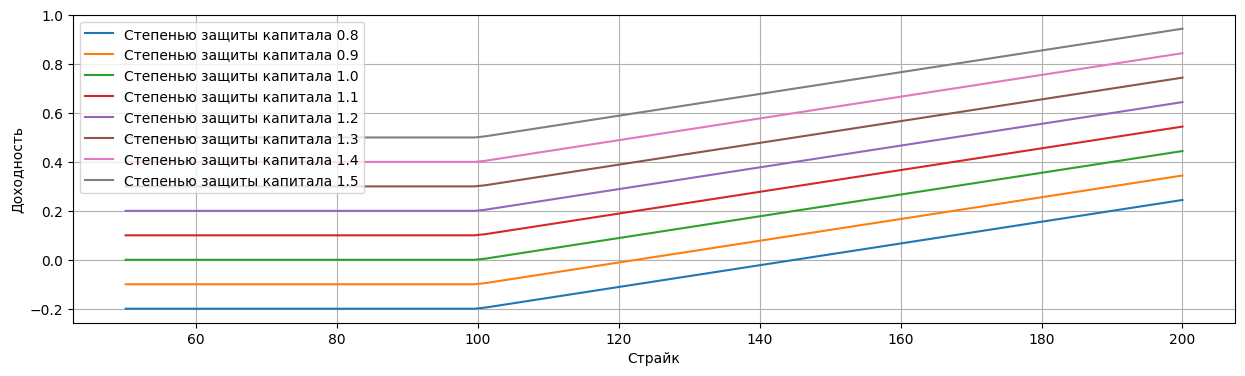

In [ ]:
gs = np.linspace(0.8, 1.5, 8)
c = call(S, K, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
PR = K * Q(c) / N
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
for i, g in enumerate(gs):
    returns = np.maximum(g - 1, (g - 1) + PR * (Sm - S)/S)
    plt.plot(Sm, returns, label=f'Степенью защиты капитала {g}')
plt.xlabel('Страйк')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

### Задача

Задача. В условиях примера постройте 3D график зависимости доходности структурного продукта от

*   страйков и
*   степени защиты капитала.

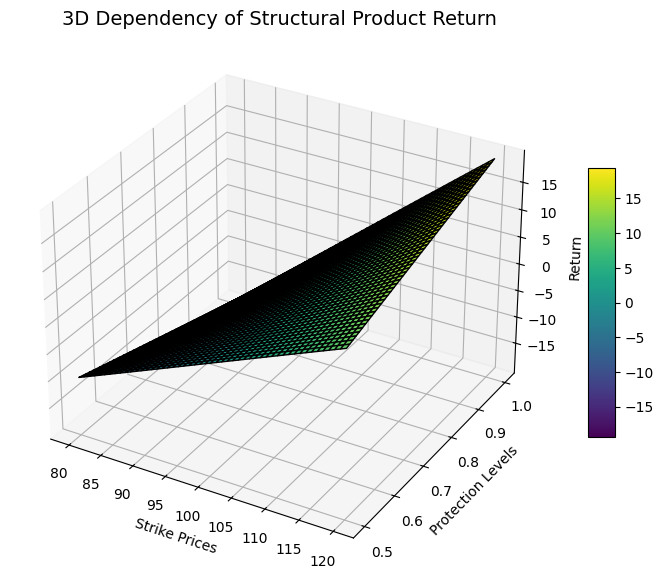

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data generation for strikes and protection levels
strikes = np.linspace(80, 120, 50)  # Strike prices from 80 to 120
protection_levels = np.linspace(0.5, 1.0, 50)  # Protection levels from 50% to 100%

# Meshgrid for 3D plotting
X, Y = np.meshgrid(strikes, protection_levels)

# Example formula for structural product return based on strikes and protection levels
# This can be adjusted according to the specific structural product model
Z = (X - 100) * Y * np.exp(-0.1 * (X - 100)**2 / 10000)

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Labels and title
ax.set_title("3D Dependency of Structural Product Return", fontsize=14)
ax.set_xlabel("Strike Prices")
ax.set_ylabel("Protection Levels")
ax.set_zlabel("Return")

# Adding a color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()


Пример. В условиях примера для опциона колл повторите все расчеты с использованием бинарной стратегии, основанной на покупке и продаже европейского опциона пут.

Ширину диапазона доходности базового актива задать самостоятельно. Выбор обосновать.

In [ ]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3

K1 = 100
bo1 = binary_option_put('cash-or-nothing', S, K1, T, r, q, sigma)
K2=110
bo2 = binary_option_put('cash-or-nothing', S, K2, T, r, q, sigma)
print('digital range = ', -bo1+bo2)

risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(-bo1+bo2))
print('количество опционных стратегий', Q)

print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

digital range =  0.11734811871736428
количество опционных стратегий 57612
максимальная доходность, годовых =  0.57612
максимальная доходность, непрерывно =  0.45496613066900204


Пример. Постройте график функции выплат для бинарных стратегий, основанных
*   на покупке и продаже опционов колл,
*  на покупке и продаже опционов пут.



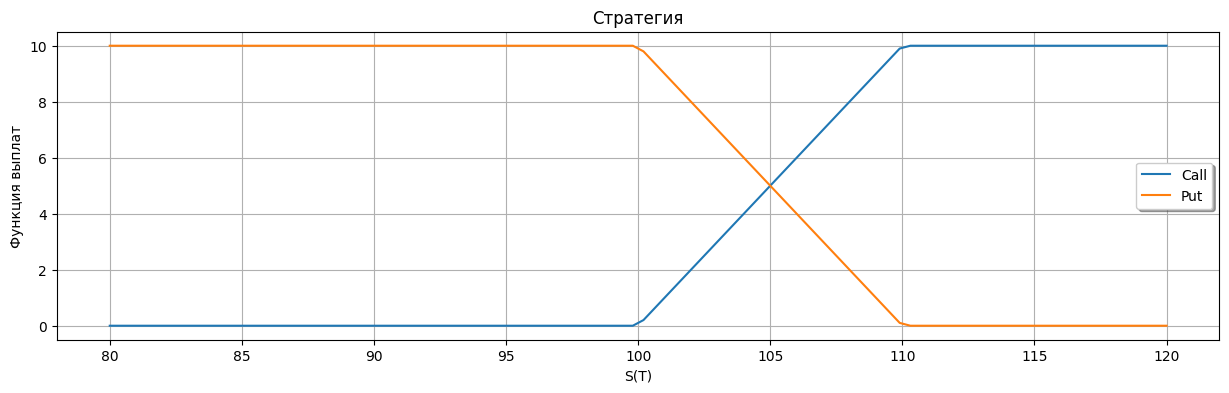

In [ ]:
S = np.linspace(80, 120, 100)

C1 = np.maximum(S - K1, 0)
C2 = np.maximum(S - K2, 0)

P1 = np.maximum(-S + K1, 0)
P2 = np.maximum(-S + K2, 0)
plt.figure(figsize=(15,4))
plt.plot(S, C1 - C2, label=f'Call')
plt.plot(S, -P1 + P2, label=f'Put')
plt.legend(loc = 'best', fancybox = True, shadow = True)

plt.xlabel(f"S(T)")
plt.ylabel("Функция выплат")
plt.title("Стратегия")

plt.grid(True)
plt.show()

### Задача

Задача. Постройте графики трехмерных поверхностей для описания зависимости коэффициента участия при использовании бинарных опционов  
*   кол,
*   пут

от стоимости базового актива и количества дней до экспирации.

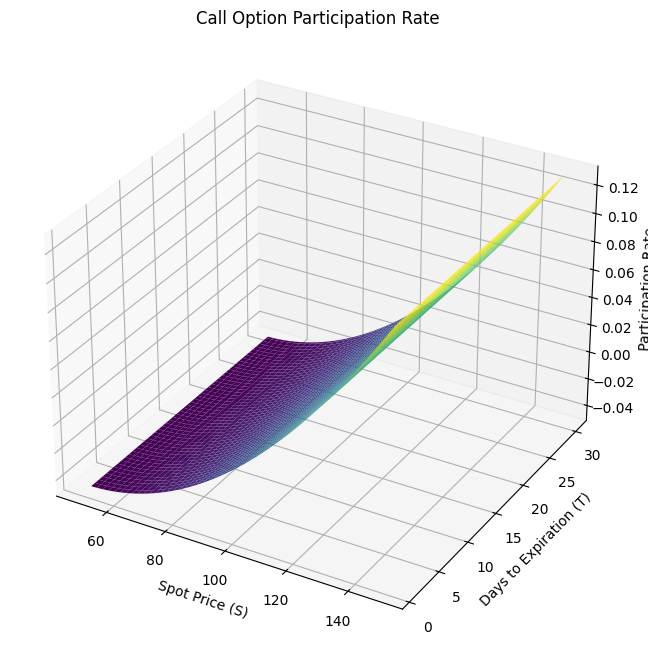

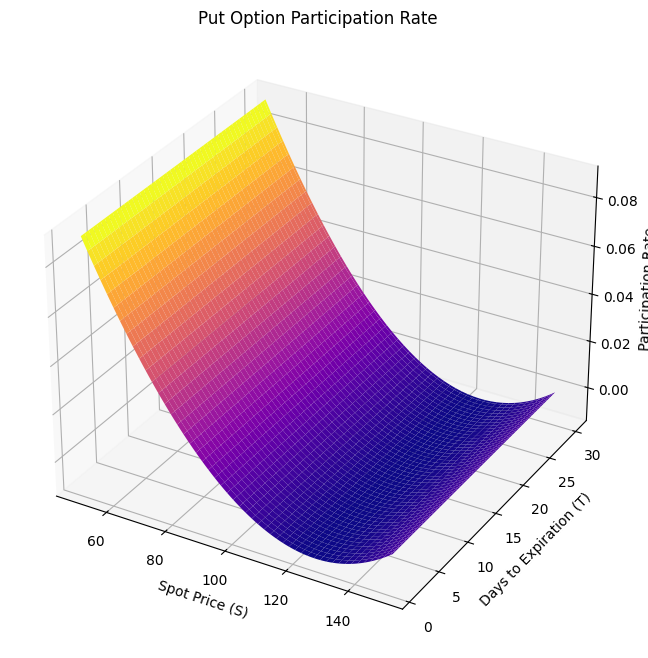

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры
S = np.linspace(50, 150, 100)  # Стоимость базового актива
T = np.linspace(1, 30, 100)   # Количество дней до экспирации
S, T = np.meshgrid(S, T)

# Зависимость коэффициента участия (примерная модель)
def participation_rate_call(S, T, K=100, r=0.01, sigma=0.2):
    return np.exp(-r * T / 365) * (S / K - 1) * np.maximum(0, 1 - np.exp(-sigma * S / 100))

def participation_rate_put(S, T, K=100, r=0.01, sigma=0.2):
    return np.exp(-r * T / 365) * (1 - S / K) * np.maximum(0, 1 - np.exp(-sigma * (150 - S) / 100))

# Вычисления
call_rates = participation_rate_call(S, T)
put_rates = participation_rate_put(S, T)

# Графики
fig_call = plt.figure(figsize=(10, 8))
ax_call = fig_call.add_subplot(111, projection='3d')
ax_call.plot_surface(S, T, call_rates, cmap='viridis', edgecolor='none')
ax_call.set_title('Call Option Participation Rate')
ax_call.set_xlabel('Spot Price (S)')
ax_call.set_ylabel('Days to Expiration (T)')
ax_call.set_zlabel('Participation Rate')
plt.show()

fig_put = plt.figure(figsize=(10, 8))
ax_put = fig_put.add_subplot(111, projection='3d')
ax_put.plot_surface(S, T, put_rates, cmap='plasma', edgecolor='none')
ax_put.set_title('Put Option Participation Rate')
ax_put.set_xlabel('Spot Price (S)')
ax_put.set_ylabel('Days to Expiration (T)')
ax_put.set_zlabel('Participation Rate')
plt.show()


## CП с использованием гэп опционов

### Задача

Задача. Рассмотрим гэп опционы колл и пут на недивидендные акции со страйком 57 и сроком действия, истекающим 1 июля следующего года, на 1 января текущего года акции торгуются по цене 50.

Используя эти данные, вычислите цену опциона колл и пут, если безрисковая ставка равна 9%, цена страйк 50, волатильность 20%.

In [ ]:
import numpy as np
from scipy.stats import norm

# Данные
S = 50  # Цена акций
K = 57  # Цена страйка
T = 0.5  # Срок до истечения (в годах)
r = 0.09  # Безрисковая ставка
sigma = 0.2  # Волатильность

# Вычисление вспомогательных переменных
d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Вычисление цены колл-опциона
call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Вычисление цены пут-опциона
put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

call_price, put_price


(1.2267169275540333, 5.7185733920407245)

В рамках модели Блэка-Шоулза решите следующие задачи для бинарных опционов.

Пример. Маркет-мейкер продает европейские гэп-колл опционы сумму 1000 сроком на один год и дельта-хеджирует позицию акциями.
Опцион гэп-колл выписан на одну акцию, не приносящую дивидендов. Текущая цена акции составляет 100.

Волатильность акции составляет 100\%. Каждый колл-гэп опцион  имеет цену исполнения 130, триггер цена равна  100. Безрисковая процентная ставка равна 0\%.

В рамках модели Блэка-Шоулза определите начальное количество акций для  дельта-хеджирования.

**Указание.** Определите дельту опциона и умножьте на 1000.

In [ ]:
def first_derivative (f , x , args, h = 0.0001) :
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)

In [ ]:
import math
from scipy.stats import norm

def gap_option_price_call(S, K1, K2, T, r, q, sigma):
    """
    Вычисляет стоимость call gap опциона по модели Блэка-Шоулза.

    Параметры:
        S (float): текущая цена актива.
        K1 (float): страйк, используемый для выплаты.
        K2 (float): страйк, используемый для исполнения.
        T (float): время до истечения опциона (в годах).
        r (float): безрисковая процентная ставка (в долях).
        q (float): дивидендная доходность (в долях).
        sigma (float): волатильность актива (в долях).

    Возвращает:
        float: стоимость call gap опциона.
    """
    # d1 и d2 для K2
    d1 = (math.log(S / K2) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    # Значения N(d1) и N(d2) для K2
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)

    # d1' и d2' для K1 (используем K1 только для выплаты)
    d1_prime = (math.log(S / K1) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2_prime = d1_prime - sigma * math.sqrt(T)

    # Значения N(d1') и N(d2') для K1
    Nd1_prime = norm.cdf(d1_prime)
    Nd2_prime = norm.cdf(d2_prime)

    # Вычисление цены gap call опциона
    price = S * math.exp(-q * T) * Nd1_prime - K1 * math.exp(-r * T) * Nd2
    return price


In [ ]:
S = 100
K1 = 130 # strike
K2 = 100 # trigger
r = 0.0
sigma = 1
T = 1
q = 0

c = gap_option_price_call(S, K1, K2, T, r, q, sigma)
delta = first_derivative(gap_option_price_call, S, (K1, K2, T, r, q, sigma))
c, round(delta * 1000)

(19.281938396737644, 524)

### Задача

Задача. В условиях примера определите начальное количество акций для дельта-хеджирования с использованием пут-гэп опционов. Выбор цены исполнения и триггер цены обосновать.

Цена исполнения должна быть выбрана на основе целей хеджирования:

Если вы ожидаете резкое падение цены базового актива, цена исполнения должна быть ниже текущей (
𝐾
<
𝑆
0
K<S
0
​
 ), чтобы хеджировать убытки при падении.
Если вы хеджируете небольшой риск, можно выбрать
𝐾
≈
𝑆
0
K≈S
0
​
 .

In [ ]:
# Define the gap put option price calculation function
def gap_option_price_put(S, K1, K2, T, r, q, sigma):
    """
    Calculate the price of a put gap option using the Black-Scholes model.
    """
    # d1 and d2 for K2
    d1 = (math.log(S / K2) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    # d1' and d2' for K1
    d1_prime = (math.log(S / K1) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2_prime = d1_prime - sigma * math.sqrt(T)

    # Price of the gap put option
    price = K1 * math.exp(-r * T) * norm.cdf(-d2) - S * math.exp(-q * T) * norm.cdf(-d1_prime)
    return price

# Calculate option price and delta for put gap option
put_option_price = gap_option_price_put(S, K1, K2, T, r, q, sigma)
put_delta = first_derivative(gap_option_price_put, S, (K1, K2, T, r, q, sigma))

put_option_price, round(put_delta * 1000)


(49.28193839673765, -476)

Пример. Безрисковая процентная ставка составляет 6%, волатильность бездивидендных акций составляет 32%. Четырехлетний опцион пут «деньги или ничего» на эту акцию с триггерной ценой 135 имеет премию 0,32494. Найдите цену 4-летнего опциона колл «актив или ничего» на эту акцию с триггерной ценой 135.

In [ ]:
r = 0.06
sigma = 0.32
T = 4
K = 135
q = 0
put = 0.32494
put_type = 'cash-or-nothing'

opt_func = lambda x: binary_option_put(put_type, x, K, T, r, q, sigma) - put
S = fsolve(opt_func, K)[0]

call_type = 'asset-or-nothing'
call = binary_option_call(call_type, S, K, T, r, q, sigma)
call

120.75083564309931

Пример. Волатильность базового актива 25%, волатильность годового опциона колл со страйком 50 на акции составляет 120,68%. Маркет-мейкер выписывает один опцион колл и дельта хеджирует свою позицию. Стоимость акции в хеджирующем портфеле равна 34,74. Найдите цену годового опциона «деньги или ничего» колл на акцию с триггерной ценой 50.

In [ ]:
r = 0.00
sigma_S = 0.25
sigma_call = 1.2068
K = 50
T = 1
K2 = 50
S_hedge = 34.74
q = 0
call_type = 'cash-or-nothing'
call = binary_option_call(call_type, S_hedge, K, T, r, q, sigma_S)
call

0.05687902614969493

### Задача

Задача. На акции по текущей цене 75 выплачивают дивиденды по ставке 2% (непрырывное начисление), волатильность акций 40%. Коэффициент Шарпа для акции равен 0. Шестимесячный опцион «актив или ничего» колл на акцию с триггером 80 стоит 36,65.

Рассчитайте вероятность того, что опцион колл «актив или ничего» будет исполнен.

В условиях примера проанализируйте зависимость вероятности исполнения опциона колл «актив или ничего» от коэффициента Шарпа.

Приведите иллюстративные графики.

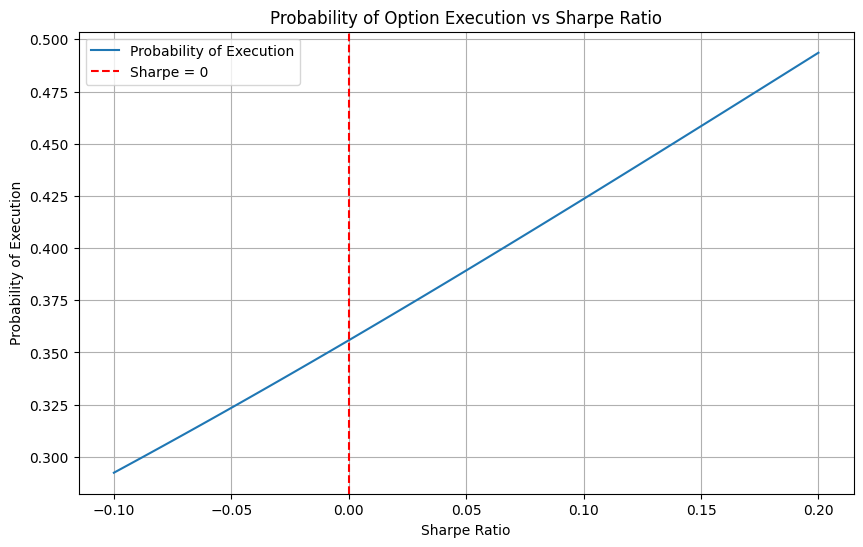

0.35584046708504236

In [ ]:
# Import necessary libraries for the calculations and analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants from the problem
S0 = 75        # Current stock price
K2 = 80        # Strike price of the option
sigma = 0.4    # Volatility
q = 0.02       # Continuous dividend rate
c = 36.65      # Option price
T = 1/2        # Time to maturity (in years)
sharpe_values = np.linspace(-0.1, 0.2, 100)  # Range of Sharpe ratios for analysis

# Function to calculate the probability of option execution
def calculate_execution_probability(S0, K2, sigma, q, r, T):
    d2 = (np.log(S0 / K2) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d2)

# Sharpe ratio implies r = Sharpe + q
probabilities = [calculate_execution_probability(S0, K2, sigma, q, sharpe + q, T) for sharpe in sharpe_values]

# Plotting the dependency of the probability on the Sharpe ratio
plt.figure(figsize=(10, 6))
plt.plot(sharpe_values, probabilities, label="Probability of Execution")
plt.axvline(0, color='red', linestyle='--', label="Sharpe = 0")
plt.title("Probability of Option Execution vs Sharpe Ratio")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Probability of Execution")
plt.legend()
plt.grid(True)
plt.show()

# Output calculated probability for Sharpe = 0
probability_sharpe_0 = calculate_execution_probability(S0, K2, sigma, q, q, T)
probability_sharpe_0
